# Assignment 3 - Lorgna Lorenzo - 829776

# Richiesta
Consider 3 model simulations of surface temperatures for the historical period 1850-2014, in particular the time series of global average annual temperature anomalies.
Plot the multi-model ensemble average surface temperature time series (mean and standera deviation), and compare with the corresponding time series from observations (see Module 2).
Very useful link: https://xarray.pydata.org/en/stable/gallery.html

In [1]:
# Import libraries

import matplotlib.pyplot as plt
import matplotlib as mpl

import cartopy.crs as ccrs
#from cartopy.util import add_cyclic_point

import xarray as xr
import nc_time_axis

import numpy as np

import pandas as pd

# Lettura 3 modelli netCDF file

In [2]:
# bisogna considerare il periodo di riferimento 1850-2014
# 3 modelli diversi, con temperature superficiali con periodo 1850-2014

# modello 1
# netCDF file for model 1
modfile1 = 'C:/Users/loren/Desktop/ts_Amon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc'
d1 = xr.open_dataset(modfile1)

# modello 2
# netCDF file for model 2
modfile2 = 'C:/Users/loren/Desktop/ts_Amon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc'
d2 = xr.open_dataset(modfile2)

# modello 3
# netCDF file for model 3
modfile3 = 'C:/Users/loren/Desktop/ts_Amon_MIROC6_historical_r1i1p1f1_gn_185001-201412.nc'
d3 = xr.open_dataset(modfile3)

# Regridding

In [3]:
d2_new = d2.interp(lat=d1.lat, lon=d1.lon, method='linear')
d3_new = d3.interp(lat=d1.lat, lon=d1.lon, method='linear')

# Calcolo anomalie

In [4]:
# climate normals per mod1
norm1 = d1.sel(time=slice('1960-01','1989-12')).mean(dim='time')
# anomalie per mod1
anom1 = d1.ts - norm1

# climate normals per mod2
norm2 = d2.sel(time=slice('1960-01','1989-12')).mean(dim='time')
# anomalie per mod1
anom2 = d2.ts - norm2

# climate normals per mod3
norm3 = d3.sel(time=slice('1960-01','1989-12')).mean(dim='time')
# anomalie per mod1
anom3 = d3.ts - norm3

In [5]:
# aggregazione spaziale, si ragiona a livello globale - ho fatto una semplice media aritmetica, sarebbe stata più giusta una media pesata
anom1_global = anom1.mean(("lon", "lat"))
# aggregazione temporale, si ragiona a livello annuo
anom1_global_year = anom1_global.groupby('time.year').mean('time')

anom2_global = anom2.mean(("lon", "lat"))
anom2_global_year = anom2_global.groupby('time.year').mean('time')

anom3_global = anom3.mean(("lon", "lat"))
anom3_global_year = anom3_global.groupby('time.year').mean('time')

# Ensemble model

In [6]:
ens_anom_123 = anom1_global_year.merge(anom2_global_year.ts.rename('ts2_anom'))
ens_anom_123 = ens_anom_123.merge(anom3_global_year.ts.rename('ts3_anom'))
ens_anom_123 = ens_anom_123.rename({'ts':'ts1_anom'})
ens_anom_123

<xarray.Dataset>
Dimensions:   (year: 165)
Coordinates:
  * year      (year) int64 1850 1851 1852 1853 1854 ... 2010 2011 2012 2013 2014
Data variables:
    ts1_anom  (year) float32 -0.9169 -0.7784 -0.7029 ... 0.9961 0.9128 0.8077
    ts2_anom  (year) float32 0.0846 0.03265 -0.1676 ... 1.207 1.185 1.077
    ts3_anom  (year) float32 -0.2711 -0.3733 -0.3573 ... 0.5331 0.933 0.8802

# Calcolo media e deviazione standard

In [7]:
ens_mean = ens_anom_123.to_array(dim='new').mean('new')
ens_stdev = ens_anom_123.to_array(dim='new2').std('new2')

ens_anom_123['ens_mean'] = ens_mean
ens_anom_123['ens_stdev'] = ens_stdev
ens_anom_123

<xarray.Dataset>
Dimensions:    (year: 165)
Coordinates:
  * year       (year) int64 1850 1851 1852 1853 1854 ... 2011 2012 2013 2014
Data variables:
    ts1_anom   (year) float32 -0.9169 -0.7784 -0.7029 ... 0.9961 0.9128 0.8077
    ts2_anom   (year) float32 0.0846 0.03265 -0.1676 ... 1.207 1.185 1.077
    ts3_anom   (year) float32 -0.2711 -0.3733 -0.3573 ... 0.5331 0.933 0.8802
    ens_mean   (year) float32 -0.3678 -0.373 -0.4093 ... 0.9121 1.01 0.9215
    ens_stdev  (year) float32 0.4145 0.3311 0.2216 ... 0.2814 0.1236 0.1136

In [8]:
ens_anom_123_df = ens_anom_123.to_dataframe()
ens_anom_123_df

,ts1_anom,ts2_anom,ts3_anom,ens_mean,ens_stdev
year,,,,,
1850,-0.916864,0.084597,-0.271136,-0.367801,0.414519
1851,-0.778358,0.032647,-0.373309,-0.373007,0.331092
1852,-0.702903,-0.167616,-0.357345,-0.409288,0.221595
1853,-0.608811,-0.110565,-0.245953,-0.321776,0.210355
1854,-0.407318,0.043843,-0.069422,-0.144299,0.191644
...,...,...,...,...,...
2010,1.091366,0.961828,0.480292,0.844495,0.262904
2011,0.602389,1.108371,0.470316,0.727025,0.274990
2012,0.996076,1.207001,0.533149,0.912075,0.281438


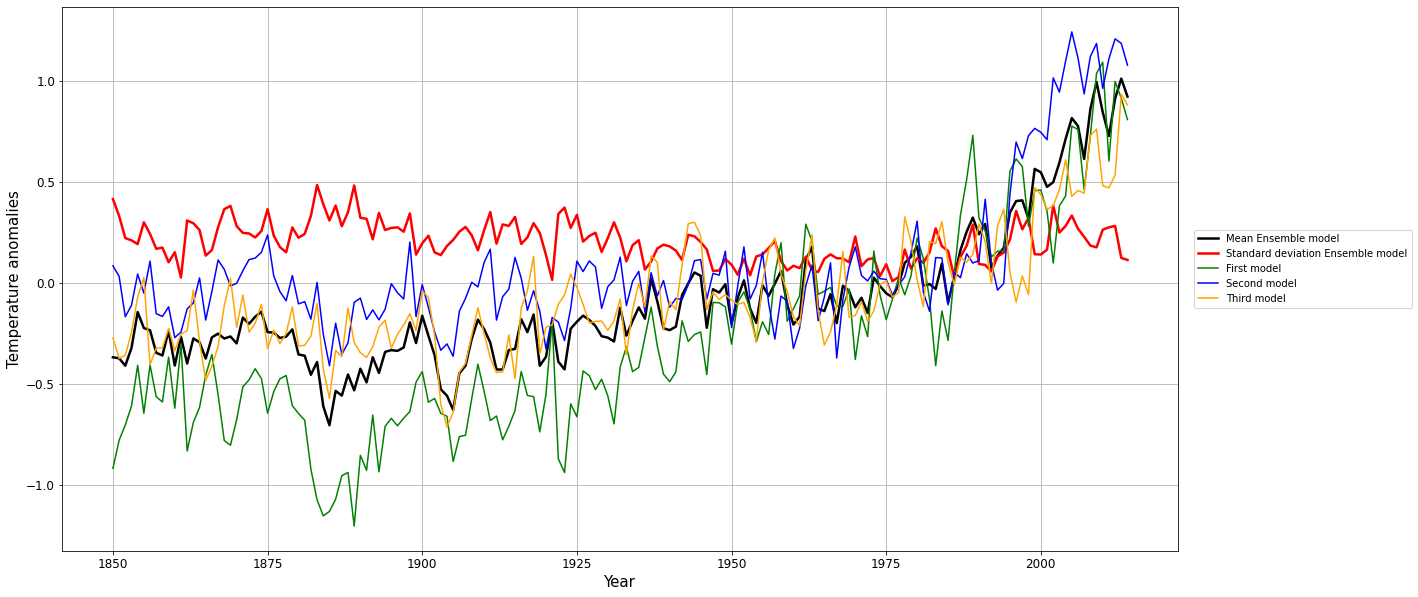

In [19]:
plt.figure(figsize =(20,10))
plt.plot(ens_anom_123_df.index, ens_anom_123_df.ens_mean, color ="black", label ="Mean Ensemble model", ls ="-", linewidth = 2.5)
plt.plot(ens_anom_123_df.index, ens_anom_123_df.ens_stdev, color ="red", label ="Standard deviation Ensemble model", ls ="-", linewidth = 2.5)
plt.plot(ens_anom_123_df.index, ens_anom_123_df.ts1_anom, color ="green", label ="First model", ls ="-")
plt.plot(ens_anom_123_df.index, ens_anom_123_df.ts2_anom, color ="blue", label ="Second model", ls ="-")
plt.plot(ens_anom_123_df.index, ens_anom_123_df.ts3_anom, color ="orange", label ="Third model", ls ="-")

plt.legend(bbox_to_anchor=(1.01, 0.5, 1.2, 0.1), loc='upper left')
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Temperature anomalies", fontsize = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.grid()

# Confronto Multi-model ensemble e HadCRUT4 model

## Media

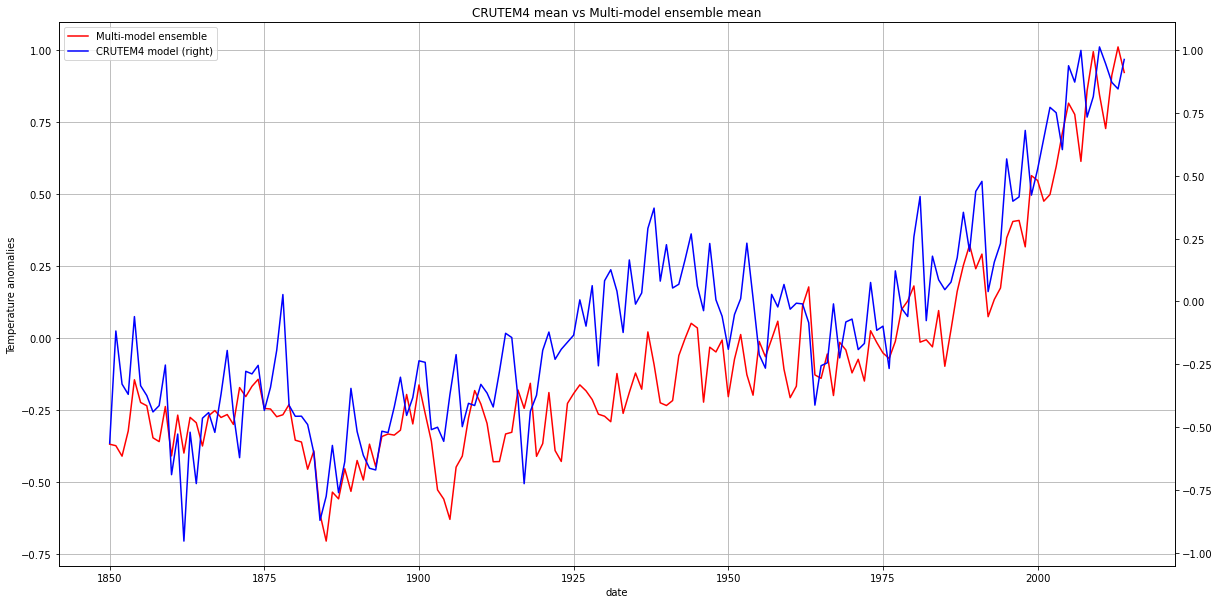

In [10]:
# MEDIA

# lettura file osservazioni modulo 2, CRUTEM4
gmta = pd.read_csv("./gmta_10295_stations", sep =",", index_col=[0])
gmta = gmta.loc[gmta.index <= "2015"]  # si seleziona fino al 2014 in modo tale che il confronto che verrà fatto sia coerente dal punto di vista temporale
# gmta  # si hanno dunque dati annuali, si riporta per ogni anno la media di tutte le anomalie di tutte le stazioni, a livello globale
gmta['date'] = gmta.index
gmta['date'] = pd.DatetimeIndex(gmta['date']).year
gmta = gmta[['date', 'gmta']]
gmta.set_index('date', inplace = True)



plt.figure(figsize=(20,10))
plt.ylabel('Temperature anomalies')

ax1 = ens_anom_123_df.ens_mean.plot(color='red', grid=True, label='Multi-model ensemble')
ax2 = gmta.gmta.plot(color='blue', grid=True, secondary_y=True, label='CRUTEM4 model')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.title('CRUTEM4 mean vs Multi-model ensemble mean')
plt.show()

## Deviazione standard

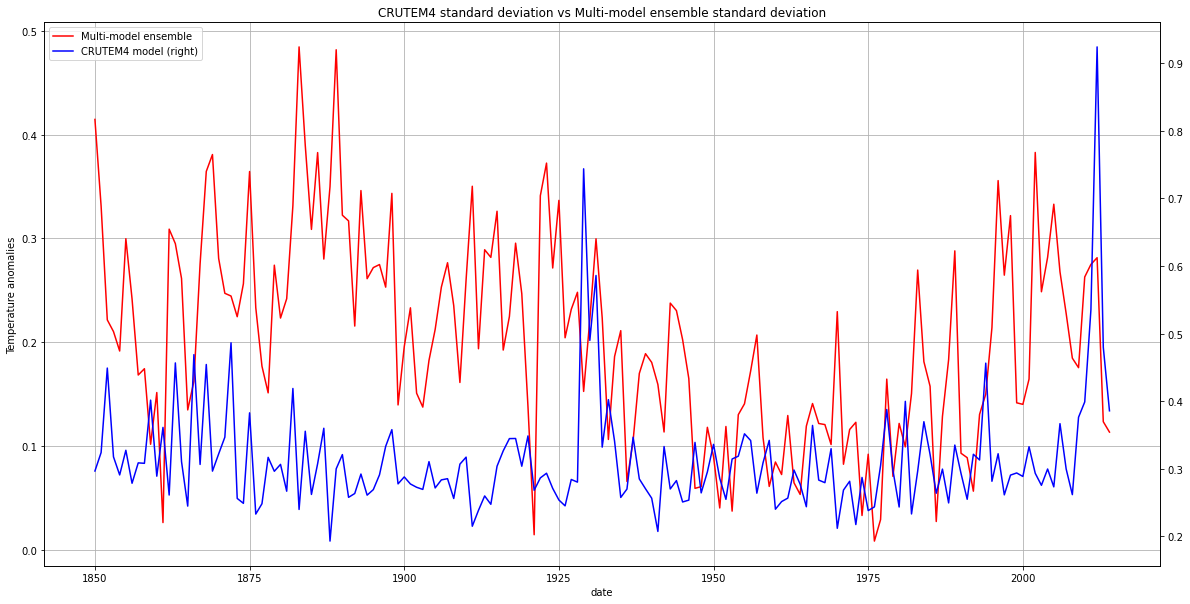

In [11]:
# DEVIAZIONE STANDARD

# lettura file osservazioni modulo 2, CRUTEM4
gsta = pd.read_csv("./gmta_sd_10295_stations", sep =",", index_col=[0])
gsta = gsta.loc[gsta.index <= "2015"]  # si seleziona fino al 2014 in modo tale che il confronto che verrà fatto sia coerente dal punto di vista temporale
# gsta  # si hanno dunque dati annuali, si riporta per ogni anno la deviazione standard di tutte le anomalie di tutte le stazioni, a livello globale
gsta['date'] = gsta.index
# gmta_2['date'] = gmta_2['date'].year
gsta['date'] = pd.DatetimeIndex(gsta['date']).year
gsta = gsta[['date', 'gmta']]
gsta.set_index('date', inplace = True)



plt.figure(figsize=(20,10))
plt.ylabel('Temperature anomalies')

ax1 = ens_anom_123_df.ens_stdev.plot(color='red', grid=True, label='Multi-model ensemble')
ax2 = gsta.gmta.plot(color='blue', grid=True, secondary_y=True, label='CRUTEM4 model')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.title('CRUTEM4 standard deviation vs Multi-model ensemble standard deviation')
plt.show()